In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
torch.cuda.is_available()

True

## Dataset & Dataloader

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:


bs = 64

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])


train_set = datasets.ImageFolder("data/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

## Arsitektur & Config

In [6]:
from jcopdl.layers import linear_block

In [7]:

class AutoEncoder(nn.Module):
    def __init__(self, z_size):
        super().__init__()
        self.encode = nn.Sequential(
            linear_block(784, 512, batch_norm=True),
            linear_block(512, 256, batch_norm=True),
            linear_block(256, z_size, activation='sigmoid')
        )
        
        self.decode = nn.Sequential(
            linear_block(z_size, 256, batch_norm=True),
            linear_block(256, 512, batch_norm=True),
            linear_block(512, 784, activation='sigmoid')
        )
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [8]:
config = set_config({
    "z_size": 32,
    "batch_size": bs
})

## Training & Preparation -> MCOC

In [9]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model/ae")

## Training

### Fiturnya sendiri adalah target

In [10]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device)
        
        output = model(feature)
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3338 | Test_cost  = 0.2563 | 




Epoch     2
Train_cost  = 0.1830 | Test_cost  = 0.1734 | 




Epoch     3
Train_cost  = 0.1593 | Test_cost  = 0.1521 | 




Epoch     4
Train_cost  = 0.1461 | Test_cost  = 0.1414 | 




Epoch     5
Train_cost  = 0.1366 | Test_cost  = 0.1344 | 




Epoch     6
Train_cost  = 0.1293 | Test_cost  = 0.1293 | 




Epoch     7
Train_cost  = 0.1227 | Test_cost  = 0.1240 | 




Epoch     8
Train_cost  = 0.1185 | Test_cost  = 0.1201 | 




Epoch     9
Train_cost  = 0.1148 | Test_cost  = 0.1177 | 




Epoch    10
Train_cost  = 0.1109 | Test_cost  = 0.1161 | 




Epoch    11
Train_cost  = 0.1075 | Test_cost  = 0.1129 | 




Epoch    12
Train_cost  = 0.1049 | Test_cost  = 0.1111 | 




Epoch    13
Train_cost  = 0.1029 | Test_cost  = 0.1095 | 




Epoch    14
Train_cost  = 0.1007 | Test_cost  = 0.1075 | 




Epoch    15
Train_cost  = 0.0991 | Test_cost  = 0.1070 | 




Epoch    16
Train_cost  = 0.0974 | Test_cost  = 0.1061 | 




Epoch    17
Train_cost  = 0.0965 | Test_cost  = 0.1058 | 




Epoch    18
Train_cost  = 0.0951 | Test_cost  = 0.1058 | 




Epoch    19
Train_cost  = 0.0946 | Test_cost  = 0.1043 | 




Epoch    20
Train_cost  = 0.0937 | Test_cost  = 0.1033 | 


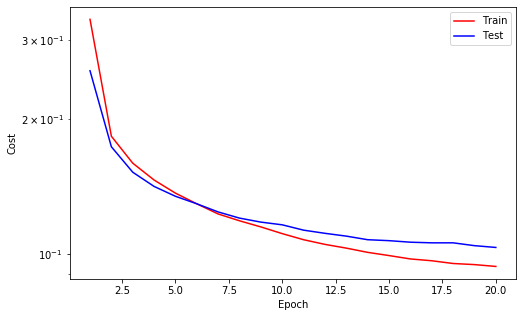



Epoch    21
Train_cost  = 0.0916 | Test_cost  = 0.1028 | 




Epoch    22
Train_cost  = 0.0906 | Test_cost  = 0.1020 | 




Epoch    23
Train_cost  = 0.0892 | Test_cost  = 0.1018 | 




Epoch    24
Train_cost  = 0.0892 | Test_cost  = 0.1015 | 




Epoch    25
Train_cost  = 0.0883 | Test_cost  = 0.1011 | 




Epoch    26
Train_cost  = 0.0878 | Test_cost  = 0.1010 | 




Epoch    27
Train_cost  = 0.0868 | Test_cost  = 0.1010 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1010




Epoch    28
Train_cost  = 0.0872 | Test_cost  = 0.1013 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1010




Epoch    29
Train_cost  = 0.0861 | Test_cost  = 0.0998 | 




Epoch    30
Train_cost  = 0.0850 | Test_cost  = 0.1006 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0998




Epoch    31
Train_cost  = 0.0846 | Test_cost  = 0.1000 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0998




Epoch    32
Train_cost  = 0.0844 | Test_cost  = 0.0998 | 




Epoch    33
Train_cost  = 0.0836 | Test_cost  = 0.0996 | 




Epoch    34
Train_cost  = 0.0835 | Test_cost  = 0.0997 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0996




Epoch    35
Train_cost  = 0.0832 | Test_cost  = 0.1001 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0996




Epoch    36
Train_cost  = 0.0829 | Test_cost  = 0.0994 | 




Epoch    37
Train_cost  = 0.0819 | Test_cost  = 0.0987 | 




Epoch    38
Train_cost  = 0.0815 | Test_cost  = 0.0991 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0987




Epoch    39
Train_cost  = 0.0810 | Test_cost  = 0.0993 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0987




Epoch    40
Train_cost  = 0.0808 | Test_cost  = 0.0988 | 


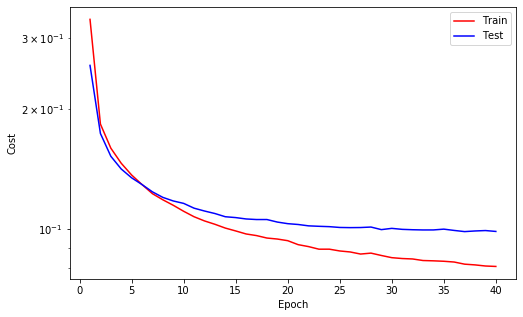

==> EarlyStop patience =  3 | Best test_cost: 0.0987




Epoch    41
Train_cost  = 0.0811 | Test_cost  = 0.0990 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0987




Epoch    42
Train_cost  = 0.0802 | Test_cost  = 0.0990 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0987
==> Execute Early Stopping at epoch: 42 | Best test_cost: 0.0987
==> Best model is saved at model/ae


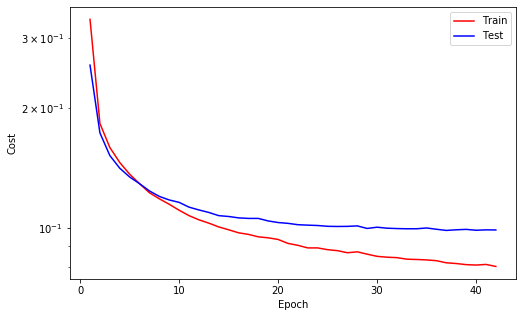

In [11]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

## Evaluate

In [12]:
feature, target = next(iter(testloader))
feature = feature.view(-1, 784).to(device)

In [13]:
with torch.no_grad():
    model.eval()
    
    enc = model.encode(feature)
    dec = model.decode(enc)

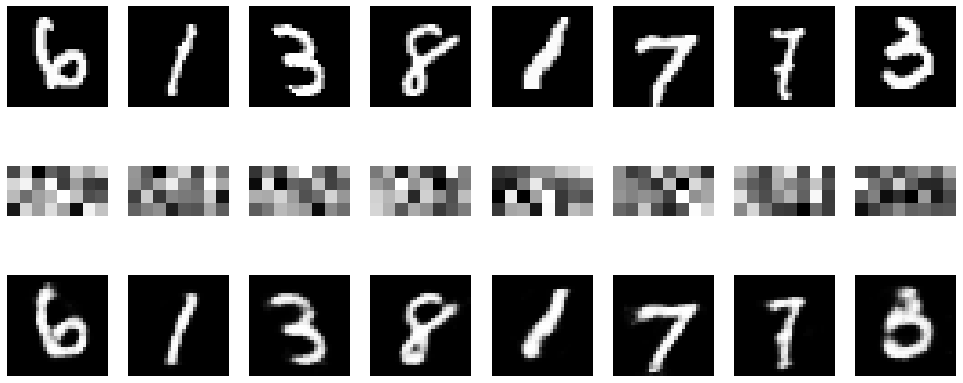

In [14]:
fig, ax = plt.subplots(3, 8, figsize=(17, 7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap='gray')
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')
    

## Playground

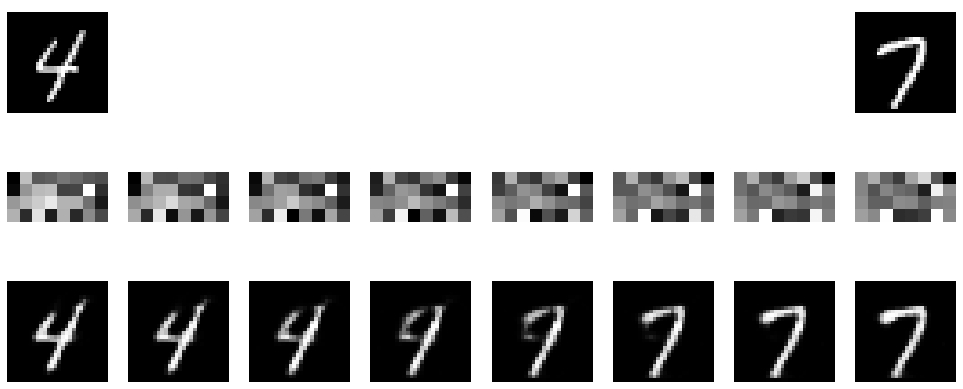

In [22]:
pic_1 = 13
pic_2 = 23

with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    
    code1, code2 = enc[pic_1], enc[pic_2]
    codes = [(1-i)*code1 + i*code2 for i in np.linspace(0, 1, 8)]
    enc = torch.stack(codes)
    
    dec = model.decode(enc)
    
fig, ax = plt.subplots(3, 8, figsize=(17, 7))

ax[0, 0].imshow(feature[pic_1].view(28, 28).cpu(), cmap='gray')
ax[0, 7].imshow(feature[pic_2].view(28, 28).cpu(), cmap='gray')

for i in range(8):
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')

## Denoising AutoEncoder

In [32]:
def add_noise(images, noise_factor=0.5):
    images = torch.clone(images)
    images += noise_factor * torch.rand_like(images)
    images = images.clamp(0., 1.)
    return images

(-0.5, 27.5, 27.5, -0.5)

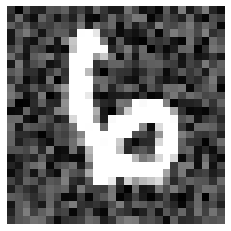

In [34]:
plt.imshow(add_noise(feature[0]).view(28, 28).cpu(), cmap='gray')
plt.axis('off')

## Training & Preparation -> MCOC

In [35]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model/ae")

## Training

### Fiturnya Asli ditambah noise, targetnya tetap bersih

In [36]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device)
        
        output = model(add_noise(feature))
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3377 | Test_cost  = 0.2572 | 




Epoch     2
Train_cost  = 0.1876 | Test_cost  = 0.1776 | 




Epoch     3
Train_cost  = 0.1633 | Test_cost  = 0.1561 | 




Epoch     4
Train_cost  = 0.1502 | Test_cost  = 0.1465 | 




Epoch     5
Train_cost  = 0.1413 | Test_cost  = 0.1407 | 




Epoch     6
Train_cost  = 0.1340 | Test_cost  = 0.1347 | 




Epoch     7
Train_cost  = 0.1283 | Test_cost  = 0.1298 | 




Epoch     8
Train_cost  = 0.1244 | Test_cost  = 0.1267 | 




Epoch     9
Train_cost  = 0.1198 | Test_cost  = 0.1230 | 




Epoch    10
Train_cost  = 0.1164 | Test_cost  = 0.1208 | 




Epoch    11
Train_cost  = 0.1133 | Test_cost  = 0.1183 | 




Epoch    12
Train_cost  = 0.1104 | Test_cost  = 0.1165 | 




Epoch    13
Train_cost  = 0.1087 | Test_cost  = 0.1154 | 




Epoch    14
Train_cost  = 0.1070 | Test_cost  = 0.1135 | 




Epoch    15
Train_cost  = 0.1053 | Test_cost  = 0.1130 | 




Epoch    16
Train_cost  = 0.1038 | Test_cost  = 0.1120 | 




Epoch    17
Train_cost  = 0.1028 | Test_cost  = 0.1123 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1120




Epoch    18
Train_cost  = 0.1011 | Test_cost  = 0.1101 | 




Epoch    19
Train_cost  = 0.0998 | Test_cost  = 0.1092 | 




Epoch    20
Train_cost  = 0.0988 | Test_cost  = 0.1093 | 


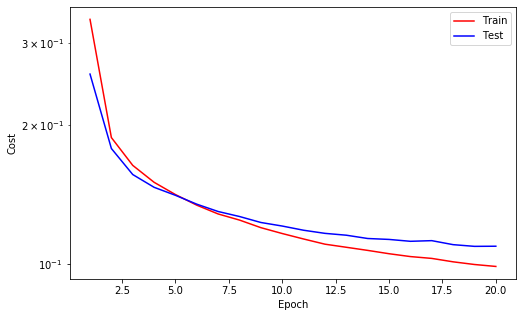

==> EarlyStop patience =  1 | Best test_cost: 0.1092




Epoch    21
Train_cost  = 0.0976 | Test_cost  = 0.1086 | 




Epoch    22
Train_cost  = 0.0968 | Test_cost  = 0.1076 | 




Epoch    23
Train_cost  = 0.0958 | Test_cost  = 0.1075 | 




Epoch    24
Train_cost  = 0.0951 | Test_cost  = 0.1064 | 




Epoch    25
Train_cost  = 0.0947 | Test_cost  = 0.1076 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1064




Epoch    26
Train_cost  = 0.0937 | Test_cost  = 0.1060 | 




Epoch    27
Train_cost  = 0.0924 | Test_cost  = 0.1055 | 




Epoch    28
Train_cost  = 0.0923 | Test_cost  = 0.1055 | 




Epoch    29
Train_cost  = 0.0919 | Test_cost  = 0.1056 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1055




Epoch    30
Train_cost  = 0.0911 | Test_cost  = 0.1056 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1055




Epoch    31
Train_cost  = 0.0902 | Test_cost  = 0.1048 | 




Epoch    32
Train_cost  = 0.0903 | Test_cost  = 0.1052 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1048




Epoch    33
Train_cost  = 0.0897 | Test_cost  = 0.1049 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1048




Epoch    34
Train_cost  = 0.0896 | Test_cost  = 0.1045 | 




Epoch    35
Train_cost  = 0.0904 | Test_cost  = 0.1049 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1045




Epoch    36
Train_cost  = 0.0885 | Test_cost  = 0.1037 | 




Epoch    37
Train_cost  = 0.0882 | Test_cost  = 0.1040 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1037




Epoch    38
Train_cost  = 0.0885 | Test_cost  = 0.1044 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1037




Epoch    39
Train_cost  = 0.0871 | Test_cost  = 0.1036 | 




Epoch    40
Train_cost  = 0.0867 | Test_cost  = 0.1035 | 


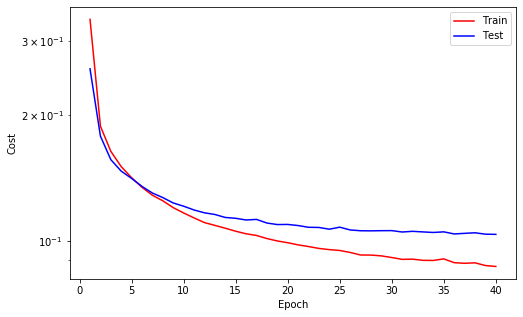



Epoch    41
Train_cost  = 0.0860 | Test_cost  = 0.1038 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1035




Epoch    42
Train_cost  = 0.0860 | Test_cost  = 0.1031 | 




Epoch    43
Train_cost  = 0.0858 | Test_cost  = 0.1038 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1031




Epoch    44
Train_cost  = 0.0860 | Test_cost  = 0.1032 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1031




Epoch    45
Train_cost  = 0.0856 | Test_cost  = 0.1027 | 




Epoch    46
Train_cost  = 0.0847 | Test_cost  = 0.1030 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1027




Epoch    47
Train_cost  = 0.0849 | Test_cost  = 0.1028 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1027




Epoch    48
Train_cost  = 0.0844 | Test_cost  = 0.1033 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1027




Epoch    49
Train_cost  = 0.0840 | Test_cost  = 0.1035 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1027




Epoch    50
Train_cost  = 0.0835 | Test_cost  = 0.1026 | 




Epoch    51
Train_cost  = 0.0833 | Test_cost  = 0.1030 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1026




Epoch    52
Train_cost  = 0.0829 | Test_cost  = 0.1025 | 




Epoch    53
Train_cost  = 0.0827 | Test_cost  = 0.1032 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1025




Epoch    54
Train_cost  = 0.0827 | Test_cost  = 0.1031 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1025




Epoch    55
Train_cost  = 0.0823 | Test_cost  = 0.1035 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1025




Epoch    56
Train_cost  = 0.0829 | Test_cost  = 0.1032 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1025




Epoch    57
Train_cost  = 0.0822 | Test_cost  = 0.1030 | 
==> EarlyStop patience =  5 | Best test_cost: 0.1025
==> Execute Early Stopping at epoch: 57 | Best test_cost: 0.1025
==> Best model is saved at model/ae


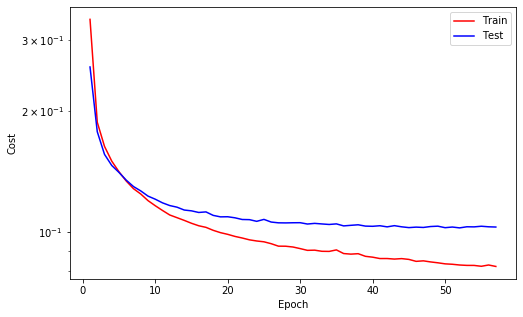

In [37]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

## Evaluate

In [38]:
feature, target = next(iter(testloader))
feature = add_noise(feature).view(-1, 784).to(device)

In [39]:
with torch.no_grad():
    model.eval()
    
    enc = model.encode(feature)
    dec = model.decode(enc)

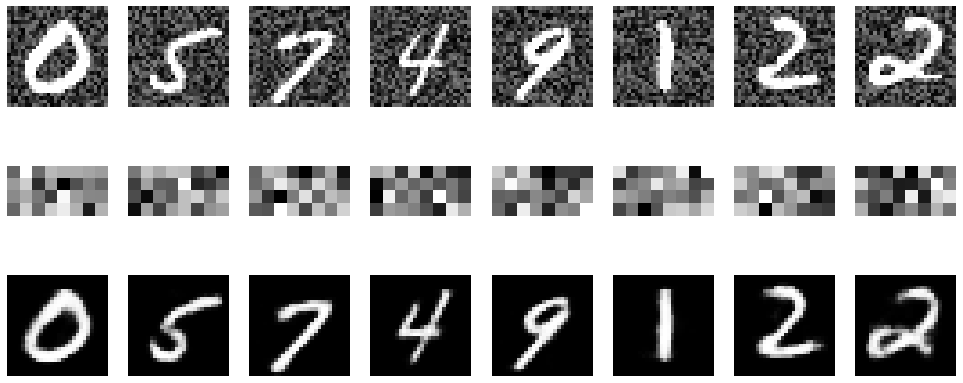

In [40]:
fig, ax = plt.subplots(3, 8, figsize=(17, 7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap='gray')
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')
    